In [1]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
import json
from cocodataset import COCODataset
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import cv2
from model import get_instance_segmentation_model

### load the pretrained weight of the model

In [2]:
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')
checkpoint = torch.load('model/faster_rcnn_122_11.pth',map_location=device)

In [3]:
model = get_instance_segmentation_model(21, backbone='resnet152')
model = model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

### inference any picture

In [4]:
image = Image.open("./pascal_train/2007_000042.jpg")
img = torchvision.transforms.ToTensor()(image)
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/conda-bld/pytorch_1587428398394/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [5]:
prediction[0]

{'boxes': tensor([[250.5405,   0.0000, 500.0000, 280.3128],
         [  0.0000,  14.5374, 260.2362, 289.5421],
         [  7.2565,  43.2366, 214.4179, 284.4349],
         [267.0541,  51.6459, 486.7993, 253.7566],
         [  0.0000,  35.5303, 500.0000, 269.7945],
         [  1.3638, 170.8361, 223.8361, 281.9792],
         [345.4006, 208.8288, 485.6685, 283.8709],
         [  0.0000,  62.4320, 500.0000, 237.7239],
         [335.8648, 209.5417, 478.7332, 285.4679],
         [  0.0000, 180.3350, 500.0000, 272.4595],
         [239.9678, 198.9740, 500.0000, 273.5311],
         [  0.0000,   7.4394, 340.3876, 291.0898],
         [238.1529, 219.3420, 500.0000, 272.0938],
         [351.6068, 213.1047, 480.7864, 279.2422],
         [  0.0000,   2.8915, 247.8048, 271.1505],
         [269.3019, 216.3114, 497.9443, 279.5263],
         [  0.0000,  22.6696, 185.8897, 127.0394],
         [ 77.1200,  72.4985, 216.8504, 277.2372],
         [  0.0000,  41.8639, 219.8348, 305.4041]], device='cuda:1'),
 'l

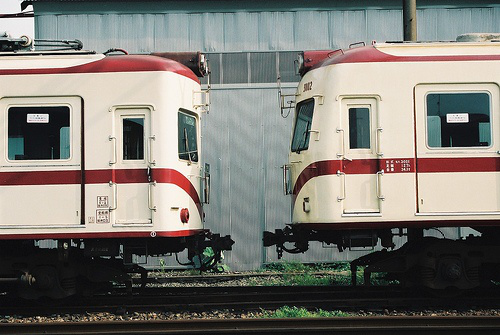

In [6]:
Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

### the pixel of picture is predicted to probability value

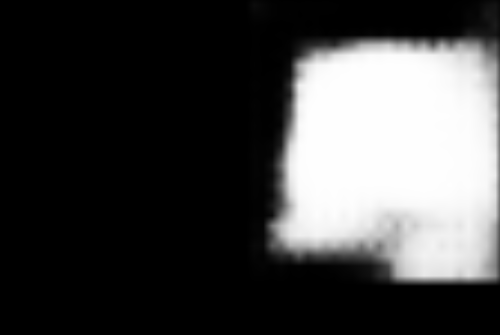

In [7]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

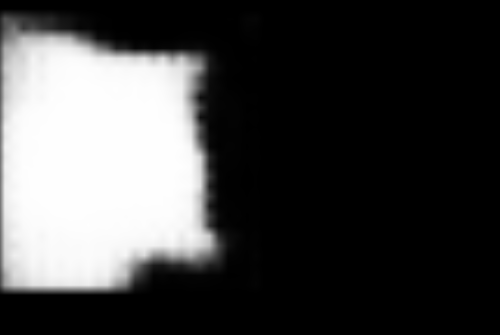

In [8]:
Image.fromarray(prediction[0]['masks'][1, 0].mul(255).byte().cpu().numpy())

### get the predicted binary mask

In [9]:
from torch.autograd import Variable
t = Variable(torch.Tensor([0.1]))  # threshold
prob = prediction[0]['masks'][0, 0].cpu()
out = (prob > t).int() 

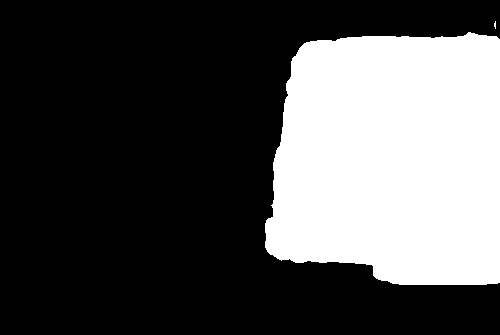

In [10]:
Image.fromarray(out.mul(255).byte().cpu().numpy())